# Correlation Matrices for several variables
Shows the correlation matrices for a single station as well as a correlation matrix of precip for all weather stations

In [38]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from functools import reduce
from scipy.spatial.distance import pdist, squareform

In [ ]:
df_valais = pd.read_csv('../../data/filtered/merged_valais.csv')
stations = pd.read_csv("../../data/clean/valais_stations.csv")

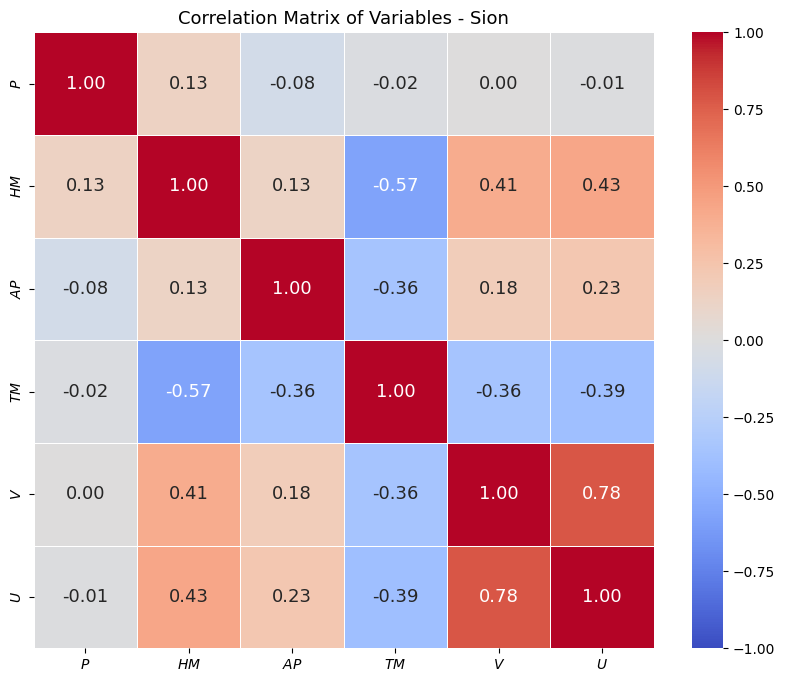

In [49]:
#correlation for sion
sion_data = (df_valais[df_valais['station'] == 'SIO']
                .drop(columns=['station', 'time', 'name', 'east', 'north', 'Canton', 'altitude'])
                .rename(columns={'precip': '$P$', 'moisture':'$HM$', 'pression':'$AP$', 'temperature':'$TM$', 'North': '$V$', 'East': '$U$'}))

correlation_matrix = sion_data.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, fmt=':^.2f', annot=True, cmap='coolwarm', center=0, vmin=-1, vmax=1, linewidths=0.5, annot_kws={"size": 13})
plt.title("Correlation Matrix of Variables - Sion", fontsize=13)
plt.savefig('../../report/figures/correlation_matrix_sion.pdf')
plt.show()

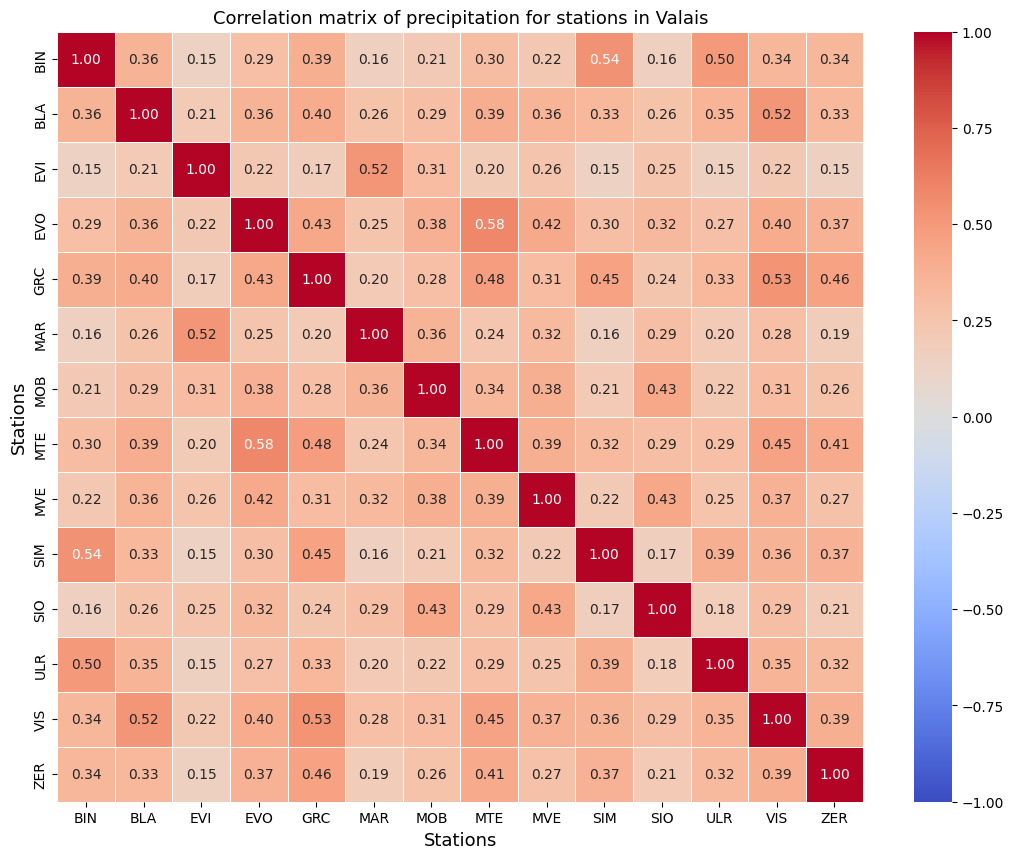

In [36]:
#cor mat for precip all stations
df_copy = df_valais.copy()
#only take stations that have more than precipitation
station_kept = stations[stations['temperature_bool']]
station_kept
filtered = df_copy[df_copy['station'].isin(station_kept['station'])]
precip_wide = filtered.pivot(index='time', columns='station', values='precip')    

correlation_matrix = precip_wide.corr()
plt.figure(figsize=(13,10))
sns.heatmap(correlation_matrix, annot=True, fmt=':^.2f', cmap='coolwarm', center=0, vmin=-1, vmax=1, linewidths=0.5)
plt.xlabel("Stations", fontsize=13)
plt.ylabel("Stations", fontsize=13)
plt.title("Correlation matrix of precipitation for stations in Valais", fontsize=13)
plt.savefig('../../report/figures/correlation_matrix_valais.pdf')
plt.show()

In [39]:
#plot correlation and distance between points
stations = stations[stations['station'].isin(df_valais['station'].unique())]

stations_np = stations[['east', 'north']].to_numpy()

distances = squareform(pdist(stations_np, metric='euclidean'))
distances = distances[np.triu_indices_from(distances, k=1)]
distances = distances.flatten()

precip_copy = df_valais[['time', 'station', 'precip']].copy()  
precip_wide = precip_copy.pivot(index= 'time', columns='station', values='precip')

correlation_matrix = precip_wide.corr()
corr_np = np.array(correlation_matrix)
corr_np = corr_np[np.triu_indices_from(corr_np, k=1)]
corr_np = corr_np.flatten()

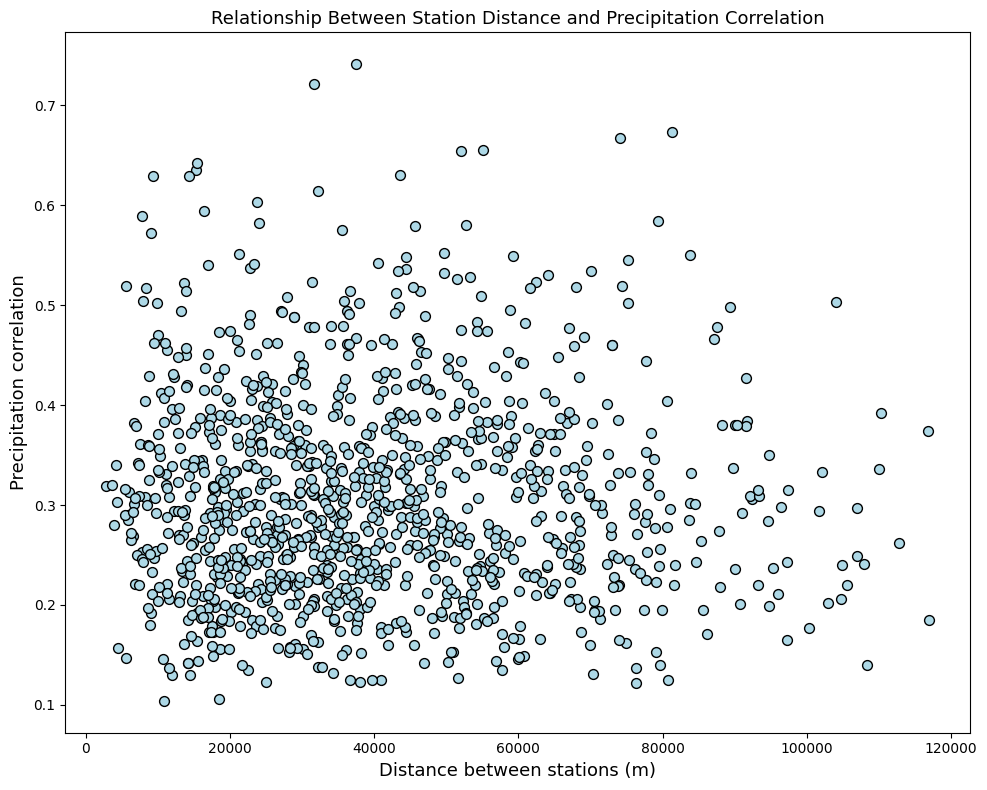

In [48]:
#plot the scatter
fig, ax = plt.subplots(figsize=(10,8))

ax.scatter(distances, corr_np, facecolors='lightblue', edgecolors='black', s=50)

# Set labels and title
ax.set_xlabel("Distance between stations (m)", fontsize=13)
ax.set_ylabel("Precipitation correlation", fontsize=13)
ax.set_title("Relationship Between Station Distance and Precipitation Correlation", fontsize=13)

# Tight layout and show plot
plt.tight_layout()
plt.savefig("../../report/figures/scatter_distance_corr_valais.pdf")
plt.show()


NameError: name 'corr' is not defined